Dataset Link: https://www.kaggle.com/datasets/zusmani/uberdrives

# Import packages 

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Detect Problems

In [2]:
path = "Uber_Dataset.csv"

In [3]:
uber_data = pd.read_csv(path)
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/16 21:11,1/1/16 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/16 1:25,1/2/16 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/16 20:25,1/2/16 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/16 17:31,1/5/16 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/16 14:42,1/6/16 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


- First Problem: We should correct the date format because it's wrong.

In [4]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
uber_data.describe()

,MILES*
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


In [6]:
uber_data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [7]:
uber_data.shape

(1155, 7)

In [8]:
uber_data.isnull()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1150,False,False,False,False,False,False,False
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False


In [9]:
uber_data.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

- Second Problem: There are a lot of null or missing values in the PURPOSE column.

In [10]:
uber_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1150    False
1151    False
1152    False
1153    False
1154    False
Length: 1155, dtype: bool

In [11]:
uber_data.duplicated().sum()

1

- Third Problem: There is a duplicate value.

In [12]:
uber_data.nunique()

START_DATE*    1154
END_DATE*      1154
CATEGORY*         2
START*          177
STOP*           188
MILES*          256
PURPOSE*         10
dtype: int64

# Summary of Problems:
> 1. First Problem: We should correct the date format because it's wrong.
> 2. Second Problem: There are a lot of null or missing values in the PURPOSE column.
> 3. Third Problem: There is a duplicate value.

# Data Cleaning

### replacing the missing values of the PURPOSE* column with the word unknown:   

In [13]:
uber_data['PURPOSE*'].fillna("Unknown", inplace = True)

In [14]:
uber_data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

### Remove Duplicates:

In [15]:
uber_data = uber_data.drop_duplicates()

In [16]:
uber_data.duplicated().sum()

0

### Correct the format of the Date columns:

In [17]:
uber_data['START_DATE*'] = pd.to_datetime(uber_data['START_DATE*'])
uber_data['END_DATE*'] = pd.to_datetime(uber_data['END_DATE*'])

### Separate Date to year, month, day, and hour columns to be easier in analysis:

In [18]:
uber_data['Start_year'] = uber_data['START_DATE*'].dt.year
uber_data['Start_Month'] = uber_data['START_DATE*'].dt.month_name()
uber_data['Start_Day']   = uber_data['START_DATE*'].dt.day_name()
uber_data['Start_Hour']  = uber_data['START_DATE*'].dt.hour

### Trip Duration Time Calculation:

In [19]:
uber_data["Trip_Duration_Time"] = uber_data['END_DATE*'] - uber_data['START_DATE*']

In [20]:
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Start_year,Start_Month,Start_Day,Start_Hour,Trip_Duration_Time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016,January,Friday,21,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,2016,January,Saturday,1,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016,January,Saturday,20,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016,January,Tuesday,17,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016,January,Wednesday,14,0 days 01:07:00


In [21]:
uber_data.nunique()

START_DATE*           1154
END_DATE*             1154
CATEGORY*                2
START*                 177
STOP*                  188
MILES*                 256
PURPOSE*                11
Start_year               1
Start_Month             12
Start_Day                7
Start_Hour              23
Trip_Duration_Time      99
dtype: int64

### Dropping START_DATE*, END_DATE* and Start_year columns

In [22]:
uber_data.drop({'START_DATE*', 'END_DATE*', 'Start_year'}, axis = 1)

,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Start_Month,Start_Day,Start_Hour,Trip_Duration_Time
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,January,Friday,21,0 days 00:06:00
1,Business,Fort Pierce,Fort Pierce,5.0,Unknown,January,Saturday,1,0 days 00:12:00
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,January,Saturday,20,0 days 00:13:00
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,January,Tuesday,17,0 days 00:14:00
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,January,Wednesday,14,0 days 01:07:00
...,...,...,...,...,...,...,...,...,...
1150,Business,Kar?chi,Kar?chi,0.7,Meeting,December,Saturday,1,0 days 00:07:00
1151,Business,Kar?chi,Unknown Location,3.9,Temporary Site,December,Saturday,13,0 days 00:18:00
1152,Business,Unknown Location,Unknown Location,16.2,Meeting,December,Saturday,15,0 days 00:35:00
1153,Business,Katunayake,Gampaha,6.4,Temporary Site,December,Saturday,21,0 days 00:18:00


# Data Analysis

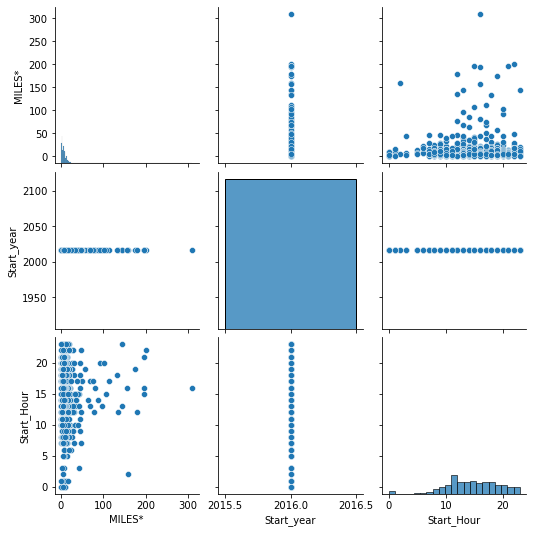

In [23]:
sns.pairplot(uber_data)

In [24]:
uber_data["Start_Month"].value_counts()

December     146
August       133
November     122
February     115
March        113
July         112
June         107
October      106
January       61
April         54
May           49
September     36
Name: Start_Month, dtype: int64

C:\Users\Function\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


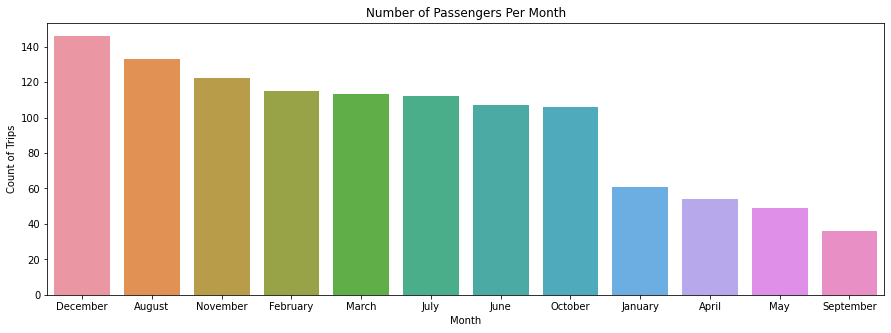

In [25]:
plt.figure(figsize=[15,5])
sns.countplot(uber_data['Start_Month'], order = uber_data['Start_Month'].value_counts().index)
plt.xlabel("Month")
plt.ylabel("Count of Trips")
plt.title("Number of Passengers Per Month")
plt.show()

- December is the most month that has passenger requests in Uber.

In [26]:
uber_data["Start_Day"].value_counts()

Friday       206
Tuesday      175
Monday       174
Thursday     154
Saturday     150
Sunday       148
Wednesday    147
Name: Start_Day, dtype: int64

C:\Users\Function\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


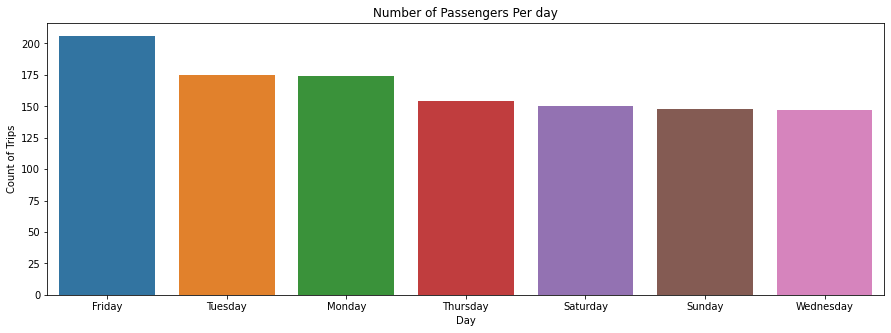

In [27]:
plt.figure(figsize=[15,5])
sns.countplot(uber_data['Start_Day'], order = uber_data['Start_Day'].value_counts().index)
plt.xlabel("Day")
plt.ylabel("Count of Trips")
plt.title("Number of Passengers Per day")
plt.show()

- Friday is the most day that has passenger requests in Uber.

In [28]:
uber_data["Start_Hour"].value_counts()

15    98
17    95
18    94
13    94
14    89
16    88
12    77
11    72
20    71
19    68
10    65
21    51
9     51
8     35
22    31
23    25
0     19
7     13
1      5
6      4
5      4
3      3
2      2
Name: Start_Hour, dtype: int64

C:\Users\Function\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


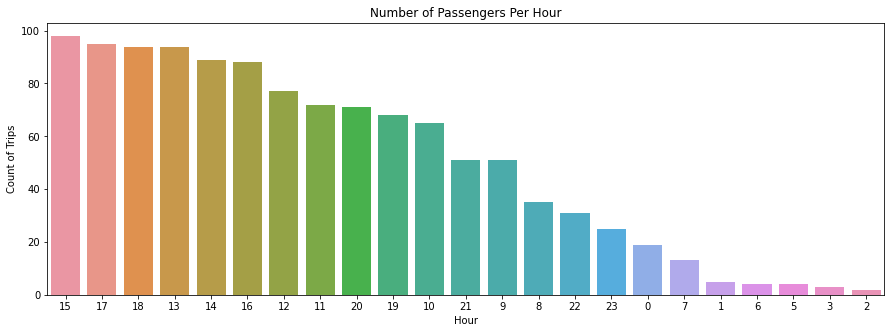

In [29]:
plt.figure(figsize=[15,5])
sns.countplot(uber_data['Start_Hour'], order = uber_data['Start_Hour'].value_counts().index)
plt.xlabel("Hour")
plt.ylabel("Count of Trips")
plt.title("Number of Passengers Per Hour")
plt.show()

- 3pm is the most Hour that has passenger requests in Uber.

In [30]:
uber_data["CATEGORY*"].value_counts()

Business    1077
Personal      77
Name: CATEGORY*, dtype: int64

C:\Users\Function\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


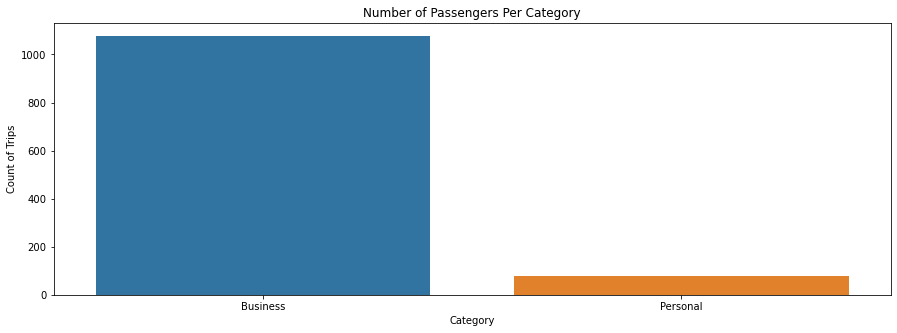

In [31]:
plt.figure(figsize=[15,5])
sns.countplot(uber_data['CATEGORY*'], order = uber_data['CATEGORY*'].value_counts().index)
plt.xlabel("Category")
plt.ylabel("Count of Trips")
plt.title("Number of Passengers Per Category")
plt.show()

- Business is the most category that requests Uber.

In [32]:
uber_data["PURPOSE*"].value_counts()

Unknown            502
Meeting            186
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: PURPOSE*, dtype: int64

C:\Users\Function\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


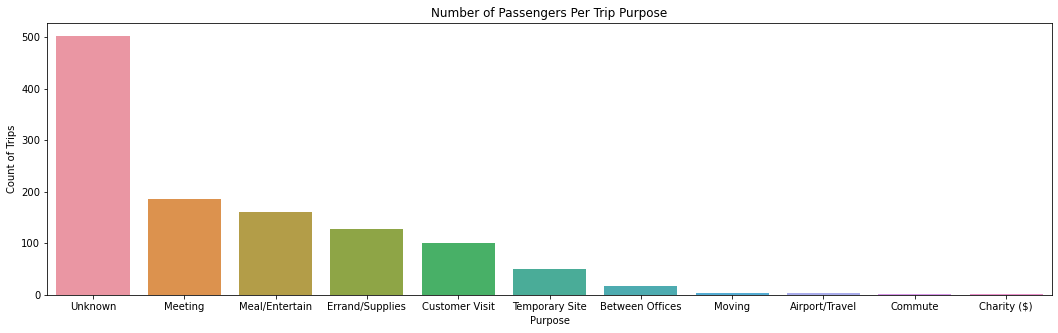

In [33]:
plt.figure(figsize=[18,5])
sns.countplot(uber_data['PURPOSE*'], order = uber_data['PURPOSE*'].value_counts().index)
plt.xlabel("Purpose")
plt.ylabel("Count of Trips")
plt.title("Number of Passengers Per Trip Purpose")
plt.show()

- Most of the passengers do not know their purpose of the trip, but most of those whose purpose we know are for the purpose of meeting.

In [34]:
uber_data["START*"].value_counts().nlargest(10)

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Lahore               36
Durham               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: START*, dtype: int64

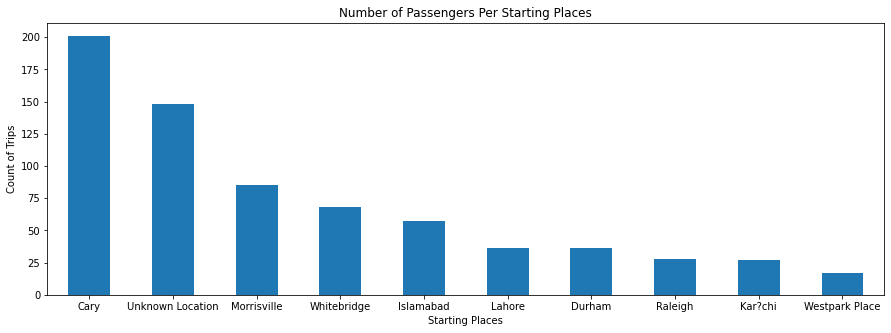

In [35]:
plt.figure(figsize=[15,5])
uber_data['START*'].value_counts().nlargest(10).plot(kind= "bar")
plt.xlabel("Starting Places")
plt.ylabel("Count of Trips")
plt.title("Number of Passengers Per Starting Places")
plt.xticks(rotation=360)
plt.show()

- Cary is the most Starting Place in requests of Uber.

In [36]:
uber_data["STOP*"].value_counts().nlargest(10)

Cary                202
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: STOP*, dtype: int64

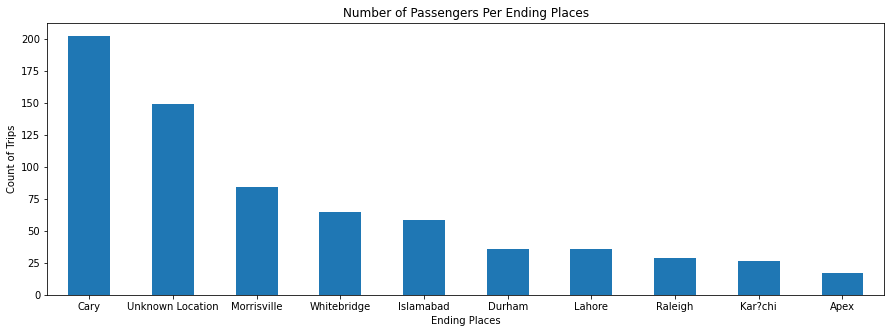

In [37]:
plt.figure(figsize=[15,5])
uber_data['STOP*'].value_counts().nlargest(10).plot(kind= "bar")
plt.xlabel("Ending Places")
plt.ylabel("Count of Trips")
plt.title("Number of Passengers Per Ending Places")
plt.xticks(rotation=360)
plt.show()

- Cary is the most Ending Place in requests of Uber.

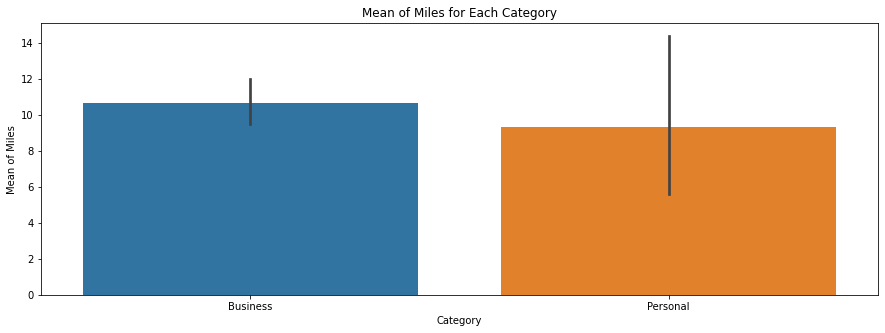

In [38]:
plt.figure(figsize=[15,5])
sns.barplot(x = uber_data['CATEGORY*'], y= uber_data['MILES*'],
            order= uber_data.groupby('CATEGORY*')['MILES*'].mean().sort_values(ascending=False).index)
plt.xlabel("Category")
plt.ylabel("Mean of Miles")
plt.title("Mean of Miles for Each Category")
plt.show()

- Mean of Miles of Business grater than Personal.

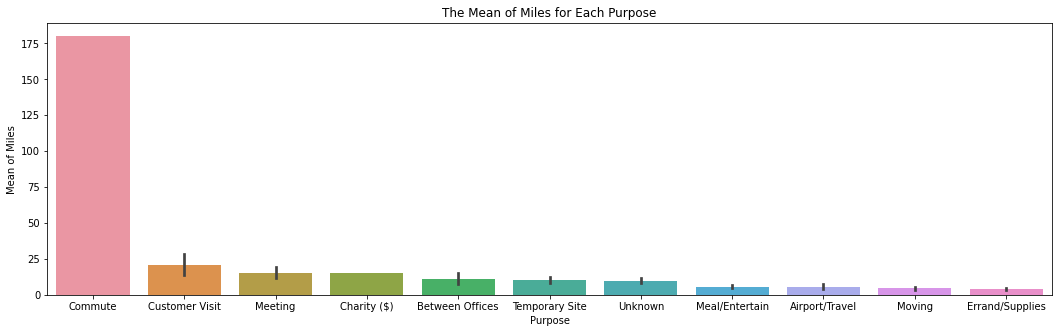

In [39]:
plt.figure(figsize=[18,5])
sns.barplot(x = uber_data['PURPOSE*'], y = uber_data['MILES*'], 
            order = uber_data.groupby('PURPOSE*')['MILES*'].mean().sort_values(ascending=False).index)
plt.xlabel("Purpose")
plt.ylabel("Mean of Miles")
plt.title("The Mean of Miles for Each Purpose")
plt.show()

- Mean of Miles of Commute grater one.

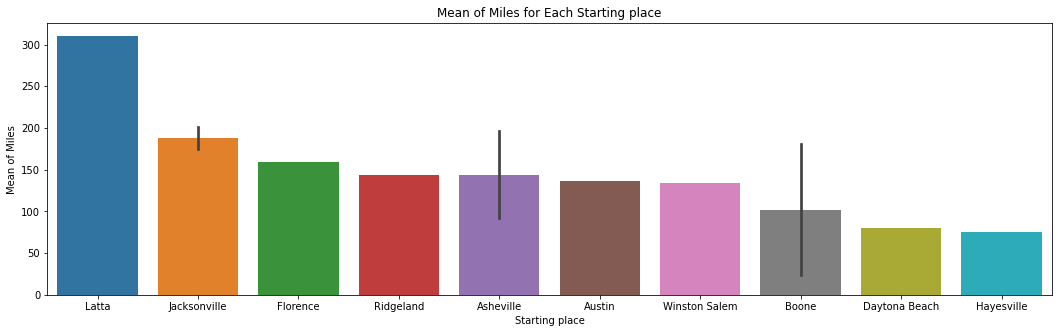

In [40]:
plt.figure(figsize=[18,5])
sns.barplot(x = uber_data['START*'], y = uber_data['MILES*'],
            order = uber_data.groupby('START*')['MILES*'].mean().sort_values(ascending=False).nlargest(10).index)
plt.xlabel("Starting place")
plt.ylabel("Mean of Miles")
plt.title("Mean of Miles for Each Starting place")
plt.show()

- Mean of Miles of Latta grater one.

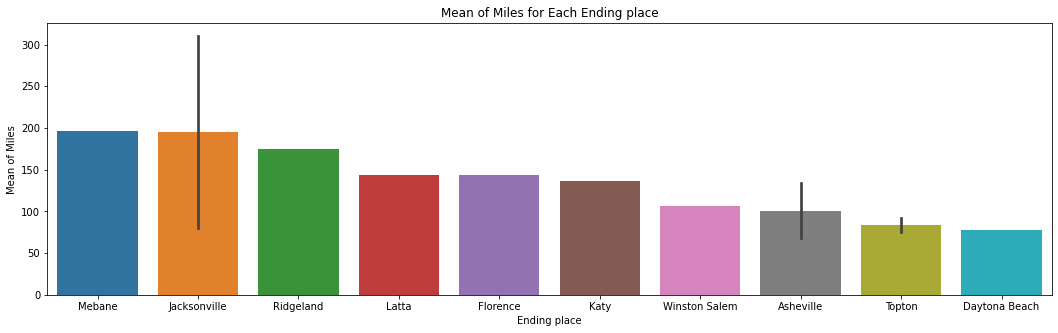

In [41]:
plt.figure(figsize=[18,5])
sns.barplot(x = uber_data['STOP*'], y = uber_data['MILES*'],
            order = uber_data.groupby('STOP*')['MILES*'].mean().sort_values(ascending=False).nlargest(10).index)
plt.xlabel("Ending place")
plt.ylabel("Mean of Miles")
plt.title("Mean of Miles for Each Ending place")
plt.show()

- Mean of Miles of Mebane grater one.

# Summary of Data Analysis:
> 1. Mean of Miles of Commute grater one.
> 2. Friday is the most day that has passenger requests in Uber.
> 3. 3pm is the most Hour that has passenger requests in Uber.
> 4. Business is the most category that requests Uber.
> 5. Most of the passengers do not know their purpose of the trip, but most of those whose purpose we know are for the purpose of meeting.
> 6. Cary is the most Starting Place in requests of Uber.
> 7. Cary is the most Ending Place in requests of Uber.
> 8. Mean of Miles of Business grater than Personal.
> 9. Mean of Miles of Commute grater one.
> 10. Mean of Miles of Latta grater one.
> 11. Mean of Miles of Mebane grater one.